## **1. LOADING THE DATASET** 

In [28]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "/content/drive/My Drive/Fruit Basket"

classes = os.listdir(dir_example)
print(classes)

['test', 'train']


In [2]:
dir_example = "/content/drive/My Drive/Fruit Basket/train"

classes = os.listdir(dir_example)
print(classes)

['Apple', 'Mango', 'Banana', 'Avocado', 'Blueberry', 'Cucumber']


In [3]:
dir_example = "/content/drive/My Drive/Fruit Basket/test"

classes = os.listdir(dir_example)
print(classes)

['Blueberry', 'Banana', 'Mango', 'Cucumber', 'Apple', 'Avocado']


In [4]:
train = "/content/drive/My Drive/Fruit Basket/train"

In [5]:
test = "/content/drive/My Drive/Fruit Basket/test"

## **2. VISUALIZING THE DATASET**

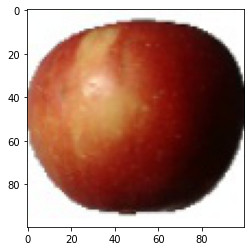

In [34]:
image1 = Image.open( '/content/drive/My Drive/imagecopies/apple.jpg')
plt.imshow(image1)

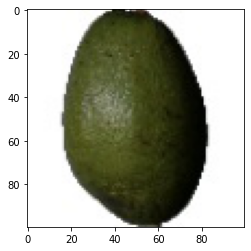

In [35]:
image1 = Image.open( '/content/drive/My Drive/imagecopies/avocado.jpg')
plt.imshow(image1)

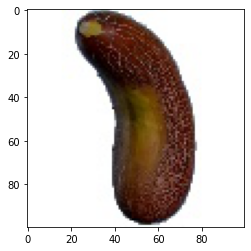

In [36]:
image1 = Image.open( '/content/drive/My Drive/imagecopies/cucumber.jpg')
plt.imshow(image1)

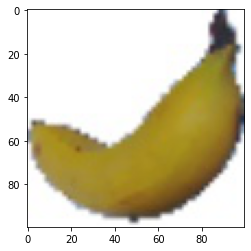

In [37]:
image1 = Image.open( '/content/drive/My Drive/imagecopies/banana.jpg')
plt.imshow(image1)

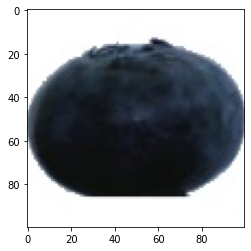

In [38]:
image1 = Image.open( '/content/drive/My Drive/imagecopies/blueberry.jpg')
plt.imshow(image1)

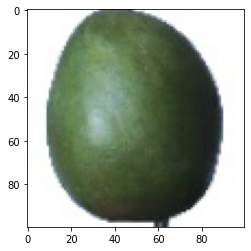

In [39]:
image1 = Image.open( '/content/drive/My Drive/imagecopies/mango.jpg')
plt.imshow(image1)

## **3. IMPORTING THE REQUIRED MODULES FOR BUILDING THE MODEL**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **4. DATA PREPARATION**

### *4.1 Training Set*

In [ ]:
# Create a generator
train_datagen = ImageDataGenerator(
  rescale=1./255
)
train_datagen = train_datagen.flow_from_directory(
        train,
        batch_size=32,
        target_size=(300, 300),
        class_mode='sparse')

#Printing the training set
labels = (train_datagen.class_indices)
print(labels,'\n')

Found 2753 images belonging to 6 classes.
{'Apple': 0, 'Avocado': 1, 'Banana': 2, 'Blueberry': 3, 'Cucumber': 4, 'Mango': 5} 



### *4.2 Test Set*

In [ ]:
# Create a generator
test_datagen = ImageDataGenerator(
  rescale=1./255
)
test_datagen = test_datagen.flow_from_directory(
        test,
        batch_size=32,
        target_size=(300, 300),
        class_mode='sparse')

#Printing the test set
labels = (test_datagen.class_indices)
print(labels,'\n')

Found 923 images belonging to 6 classes.
{'Apple': 0, 'Avocado': 1, 'Banana': 2, 'Blueberry': 3, 'Cucumber': 4, 'Mango': 5} 



### *4.3 Printing the image configuration of Training and Test set*

In [ ]:
for image_batch, label_batch in train_datagen:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

In [ ]:
for image_batch, label_batch in test_datagen:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

## **5. BUILDING THE MODEL**

In [ ]:
model=Sequential()

#Convolution blocks
model.add(Conv2D(32, kernel_size = (3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(64, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(32, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0

## **6. COMPILING THE MODEL**

In [ ]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## **7. TRAINING THE MODEL**

In [ ]:
model.fit_generator(train_datagen,
          epochs=4,
          steps_per_epoch=2753//32)

Epoch 1/4
86/86 [==============================] - 359s 4s/step - loss: 0.0404 - accuracy: 0.9842
Epoch 2/4
86/86 [==============================] - 356s 4s/step - loss: 0.0380 - accuracy: 0.9857
Epoch 3/4
86/86 [==============================] - 355s 4s/step - loss: 0.0474 - accuracy: 0.9886
Epoch 4/4
86/86 [==============================] - 352s 4s/step - loss: 0.0571 - accuracy: 0.9860


##**8. PREDICTING THE RSEULTS**

### *8.1 CREATING THE LABELS*

In [ ]:
print(train_datagen.class_indices)
Labels = '\n'.join(sorted(train_datagen.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)
class_names = list(labels.keys())

{'Apple': 0, 'Avocado': 1, 'Banana': 2, 'Blueberry': 3, 'Cucumber': 4, 'Mango': 5}


### *8.2 TESTING THE MODEL*

Probability:  1.0
Classified:  Avocado 



Text(0.5, 1.0, 'Loaded Image')

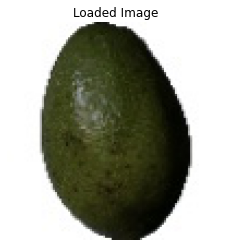

In [ ]:
from keras.preprocessing import image
import numpy as np
test_img = '/content/drive/My Drive/Fruit Basket/test/Avocado/69_100.jpg'
img = image.load_img(test_img, target_size = (300,300))
img = image.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

print("Probability: ",np.max(prediction[0], axis=-1))
predicted_class = class_names[np.argmax(prediction[0], axis=-1)]
print("Classified: ",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

Probability: 1.0
Classified:  Cucumber 



Text(0.5, 1.0, 'Loaded Image')

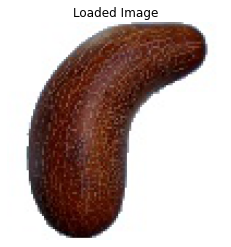

In [ ]:
test_img = '/content/drive/My Drive/Fruit Basket/test/Cucumber/200_100.jpg'
img = image.load_img(test_img, target_size = (300,300))
img = image.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = class_names[np.argmax(prediction[0], axis=-1)]
print("Classified: ",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

## *HENCE WE CAN SEE THAT OUR FRUIT CLASSIFIER IS WORKING FAIRLY SUCCESSFULLY!!*